<a href="https://colab.research.google.com/github/majetikalyan007/ML-algorithms/blob/main/KNN%26SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
# Data from the image
data = {
    'BMI': [33.6, 26.6, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 23.3, 31],
    'Age': [50, 30, 40, 67, 23, 67, 45, 46, 29, 56],
    'Sugar': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Test example
test_bmi = 43.6
test_age = 40
K = 3

df['Distance'] = np.sqrt((df['BMI'] - test_bmi)**2 + (df['Age'] - test_age)**2)


df_sorted = df.sort_values(by='Distance')

k_nearest_neighbors = df_sorted.head(K)


predicted_sugar = k_nearest_neighbors['Sugar'].mode()[0]


print("K-Nearest Neighbors:")
print(k_nearest_neighbors)
print(f"\nPredicted Sugar level for the test patient is: {predicted_sugar}")

K-Nearest Neighbors:
    BMI  Age  Sugar   Distance
6  36.7   45      1   8.521150
0  33.6   50      1  14.142136
7  25.7   46      0  18.878824

Predicted Sugar level for the test patient is: 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

data = {
    'BMI': [33.6, 26.6, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 23.3, 31],
    'Age': [50, 30, 40, 67, 23, 67, 45, 46, 29, 56],
    'Sugar': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

X = df[['BMI', 'Age']]
y = df['Sugar']


test_data = [[43.6, 40]]

knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X, y)


predicted_sugar = knn.predict(test_data)


print(f"Predicted Sugar level for the test patient is: {predicted_sugar[0]}")

Predicted Sugar level for the test patient is: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


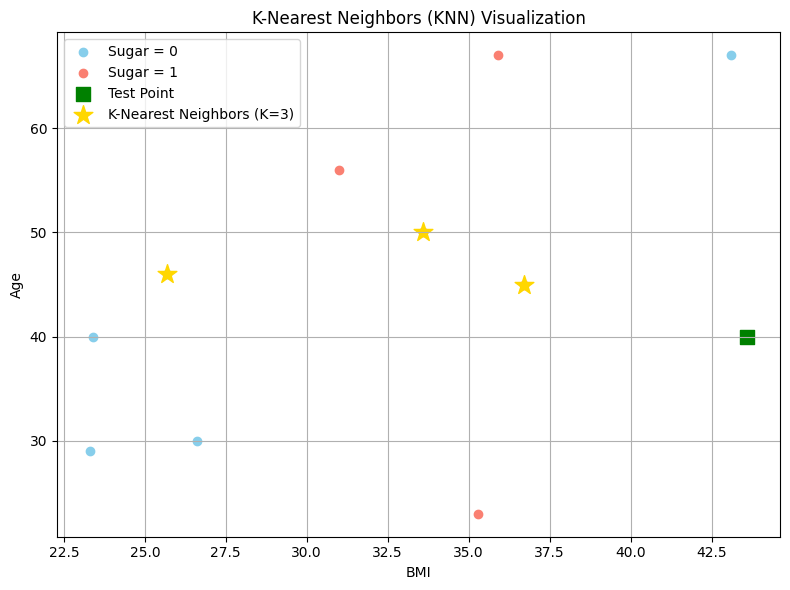

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Recreating the DataFrame with the provided data
data = {
    'BMI': [33.6, 26.6, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 23.3, 31],
    'Age': [50, 30, 40, 67, 23, 67, 45, 46, 29, 56],
    'Sugar': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Test point and K-Nearest Neighbors variables MUST be defined
test_point = pd.DataFrame({'BMI': [43.6], 'Age': [40]})
k_neighbors = pd.DataFrame({
    'BMI': [36.7, 33.6, 25.7],
    'Age': [45, 50, 46]
})

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their Sugar value
plt.scatter(df[df['Sugar'] == 0]['BMI'], df[df['Sugar'] == 0]['Age'], color='skyblue', label='Sugar = 0')
plt.scatter(df[df['Sugar'] == 1]['BMI'], df[df['Sugar'] == 1]['Age'], color='salmon', label='Sugar = 1')

# Plot the test point with a distinct marker
plt.scatter(test_point['BMI'], test_point['Age'], color='green', marker='s', s=100, label='Test Point')

# Plot the 3 nearest neighbors with a distinct marker
plt.scatter(k_neighbors['BMI'], k_neighbors['Age'], color='gold', marker='*', s=200, label='K-Nearest Neighbors (K=3)')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('K-Nearest Neighbors (KNN) Visualization')
plt.legend()
plt.grid(True)
plt.tight_layout()



In [ ]:
`import pandas as pd
from sklearn.svm import SVC

data = {
    'BMI': [33.6, 26.6, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 23.3, 31],
    'Age': [50, 30, 40, 67, 23, 67, 45, 46, 29, 56],
    'Sugar': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

X = df[['BMI', 'Age']]
y = df['Sugar']

# Step 2: Create and train the SVM model
# Using a linear kernel for this dataset
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)


test_patient = [[43.6, 40]]
predicted_sugar = svm_model.predict(test_patient)


print(f"The SVM model predicts the sugar level for the test patient is: {predicted_sugar[0]}")

The SVM model predicts the sugar level for the test patient is: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 5. Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# 6. Evaluate the model's performance
print("--- Model Evaluation ---")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

--- Model Evaluation ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
